## Classification Predict
 #### Lereko Qholosha
The the structure of the nootebook is as follows:

# Table of Contents

* 1 Project Overview
    - 1.1 Problem Statement
    - 1.2 Problem Landscape
* 2. Imports
* 3. Importing the dataset
* 4. Exploratory Data Analysis
* 5 Distribution of target variable
    - 5.1 Text Cleaning
* 6 Data Preprocessing
    - 6.1 Merge  datasets
    - 6.2 Converting html entities
    - 6.3 Changing Tweets into lowercase
    - 6.4 Word Tokenization
    - 6.5 Removing Stop Words
    - 6.6 Word Stemming
* 7 Feature Engineering
    - 7.1 Split data into Train & Test sets
    - 7.2 CountVectorizer
    - 7.3 Building the pipeline
* 8. Modeling
    - 8.1 Train-test split
    - 8.2 Model training
    - 8.3 Tuning the chosen models
* 9. Generating a submission file
* 10. References
    



# 1. Project Overview
## Predict an individual’s belief in climate change based on historical tweet data

<a id="1"></a>
##  Introduction:
Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

Our goal within this notebook is creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

<a id="1.1"></a>
## **1.1 Problem Statement:**
Build a Natural Language Processing model to classify whether or not a person believes in climate change, based on their novel tweet data.

<a id="1.2"></a>
## 1.2 **Problem Landscape:**

###  **Data**:

>    The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes
Class Description 

 **Description**

2 News: the tweet links to factual news about climate change 

1 Pro: the tweet supports the belief of man-made climate change 

0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change 

-1 Anti: the tweet does not believe in man-made climate change

**Variable definitions:**

- ***sentiment***: Sentiment of tweet

- ***message***: Tweet body

- ***tweetid***: Twitter unique id


<a id="2"></a>

# **2. Imports**

In [1]:
# Required packages to save model
import pickle
# Import Libraries for Data Visualisation
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from matplotlib.colors import ListedColormap
%matplotlib inline



# Import libraries for Natural Languge Processing
import re
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from html.parser import HTMLParser
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

# Import library for Feature Extraction
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

# Import library for train test split
from sklearn.model_selection import train_test_split

# Import Machine Learning algorithms
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

# Import libraries for model evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Import warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


<a id="3"></a>
# **3. Importing the dataset**

1. Train.csv:  Dataset that contains all the variables that should be used to train the model

2. Test.csv :  Dataset that contains variables that will be used to test the model

In [2]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
# Importing the train & test data sets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
# View the first 5 rows of the train data
train_df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [5]:
# View the first 5 rows of the test data
test_df.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


## summary of our datasets

In [6]:
train_df.shape[0]

15819

In [7]:
train_df.shape[1]

3

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [9]:
train_df.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


# Missing values
Unfortunately we dont have any missing values from our datasets

In [10]:
test_df.isnull().sum(axis=0)

message    0
tweetid    0
dtype: int64

In [11]:
train_df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

<a id="4"></a>

# **4. Exploratory Data Analysis**
The following section provides an overview of the given data. We looks at  some key inights of the raw data where we look at sentiment distribution of the data. This has been illustrated using graphs.  We also visualise word frequency of messages of the unprocessed train and test data.

In [12]:
# Let us inspect the dimensions of the data sets.
print('train dim:', train_df.shape, 'test dim:', test_df.shape)
train_df.iloc[0:2]

train dim: (15819, 3) test dim: (10546, 2)


,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103


<a id="5"></a>
# 5. Distribution of the Target variable

Text(0.5, 1.0, 'Class Distributions')

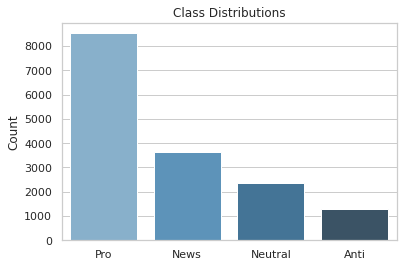

In [13]:
# Create class distribution dataframe
class_dist = pd.DataFrame(list(train_df['sentiment'].value_counts()),
                          index=['Pro', 'News', 'Neutral', 'Anti'],
                          columns=['Count'])

# Plot class distribution
sns.set(style="whitegrid")
sns.barplot(x=class_dist.index, y=class_dist.Count, 
           palette="Blues_d")
plt.title('Class Distributions')

In [14]:
# A count of each class of sentiment in the train data set
class_dist

,Count
Pro,8530
News,3640
Neutral,2353
Anti,1296


**Notes:**

* There are no missing values in the data.

* Class distribution is skewed to the 'Pro' sentiment.

* The sum of tweets relating to News, Neutral & Anti is less than half of the total tweets.

 <a id="5.1"></a>
## **5.1 Text Cleaning:**

In order to visualise the tweets we have to clean the data.

In [15]:
# Extract tweets from dataframe & creating a new dataframe with only tweets
raw_tweets = train_df['message']

# View top 5 rows of raw_tweets
raw_tweets[3010:3015]

3010    sorry at drivenorth\r\nbut at communism_kills\...
3011    RT @6esm: Climate change, myth and religion: F...
3012    As reported by the latest claims, the truth ar...
3013    @AJEnglish @derrickg745 It's ok According to t...
3014    U really out here on Twitter expecting everybo...
Name: message, dtype: object

### Using the Regex library to clean the raw tweets dataframe:
Regular expressions (called REs, or regexes, or regex patterns) are essentially a tiny, highly specialized programming language embedded inside Python and made available through the re module. Using this little language, you specify the rules for the set of possible strings that you want to match; this set might contain English sentences, or e-mail addresses, or TeX commands, or anything you like. You can then ask questions such as “Does this string match the pattern?”, or “Is there a match for the pattern anywhere in this string?”. You can also use REs to modify a string or to split it apart in various ways. For more information on regular expressions, [Click here](http://docs.python.org/3/howto/regex.html).

In [19]:
# Replace email addresses with 'email'
tweets = raw_tweets.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Remove unicode strings
tweets = tweets.str.replace(r'(\\u[0-9A-Fa-f]+)', '')
tweets = tweets.str.replace(r'[^\x00-\x7f]', '')

# Convert any url to URL
tweets = tweets.str.replace('((www\.[^\s]+)|(https?://[^\s]+))',
                            'website')

# Remove special characters, numbers, punctuation
tweets = tweets.str.replace('[^a-zA-Z#@]+',' ')

# Remove additional white spaces
tweets = tweets.str.replace(r'\s+', ' ')
tweets = tweets.str.replace(r'^\s+|\s+?$', '')

# Change words to lower case
tweets = tweets.str.lower()

# Remove stop words from tweets
stop_words = set(stopwords.words('english'))

tweets = tweets.apply(lambda x: ' '.join(
    word for word in x.split() if word not in stop_words))

In [20]:
# Viewing the changed message column
tweets[:5]

0    polyscimajor epa chief think carbon dioxide ma...
1      like lack evidence anthropogenic global warming
2    rt @rawstory researchers say three years act c...
3    #todayinmaker# wired pivotal year war climate ...
4    rt @soynoviodetodas racist sexist climate chan...
Name: message, dtype: object

In [21]:
# Creating a dataframe from the cleaned up message column
tweets_df = pd.DataFrame(tweets)

# Add sentiment column to the tweets dataframe
tweets_df['sentiment'] = train_df['sentiment']

# View the top 5 rows of tweets
tweets_df.head()

,message,sentiment
0,polyscimajor epa chief think carbon dioxide ma...,1
1,like lack evidence anthropogenic global warming,1
2,rt @rawstory researchers say three years act c...,2
3,#todayinmaker# wired pivotal year war climate ...,1
4,rt @soynoviodetodas racist sexist climate chan...,1


 ## 5.2 Visualising a corpus for each sentiment class:

Now we will create a corpus for each sentiment class. In linguistics, a corpus is a large and structured set of texts. In corpus linguistics, they are used to do statistical analysis and hypothesis testing, checking occurrences or validating linguistic rules within a specific language territory.

In [22]:
# Create a Corpus for every class sentiment 
news_tweets = ' '.join([text for text in tweets_df['message']
                        [tweets_df['sentiment'] == 2]])
pro_tweets = ' '.join([text for text in tweets_df['message']
                       [tweets_df['sentiment'] == 1]])
neutral_tweets = ' '.join([text for text in tweets_df['message']
                           [tweets_df['sentiment'] == 0]])
anti_tweets = ' '.join([text for text in tweets_df['message']
                        [tweets_df['sentiment'] == -1]])

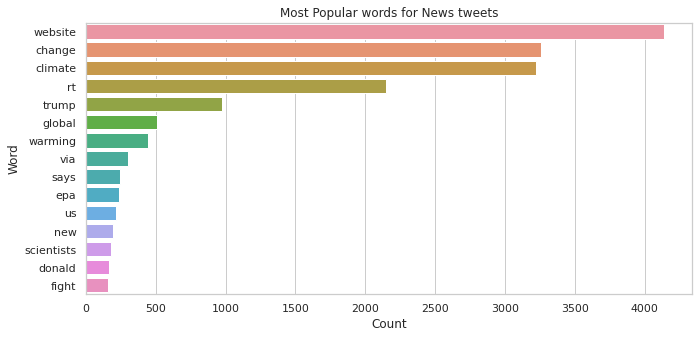

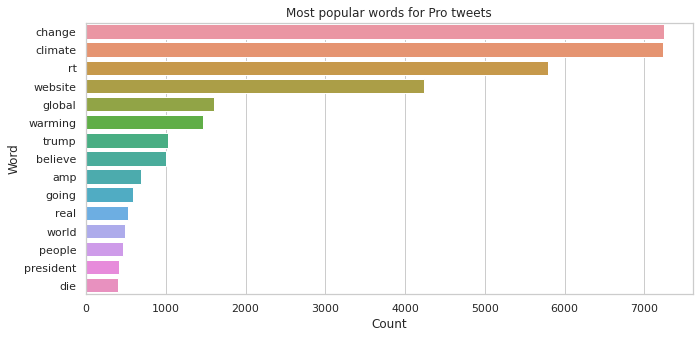

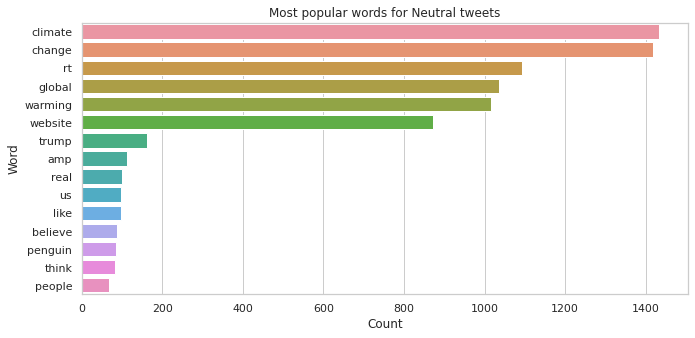

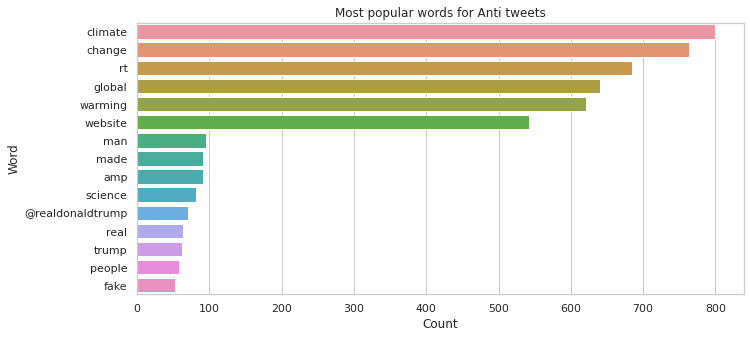

In [23]:
# Visualising each sentiment class according to the count of words
full_title = ['Most Popular words for News tweets',
              'Most popular words for Pro tweets',
              'Most popular words for Neutral tweets',
              'Most popular words for Anti tweets']

tweet_list = [news_tweets, pro_tweets,
              neutral_tweets, anti_tweets]

plt.rcParams['figure.figsize'] = [50, 5]

for i, sent in enumerate(tweet_list):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent.split(' '))
    df = pd.DataFrame({'Word': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df, y='Word', x='Count')
    plt.title(full_title[i])
    plt.show()

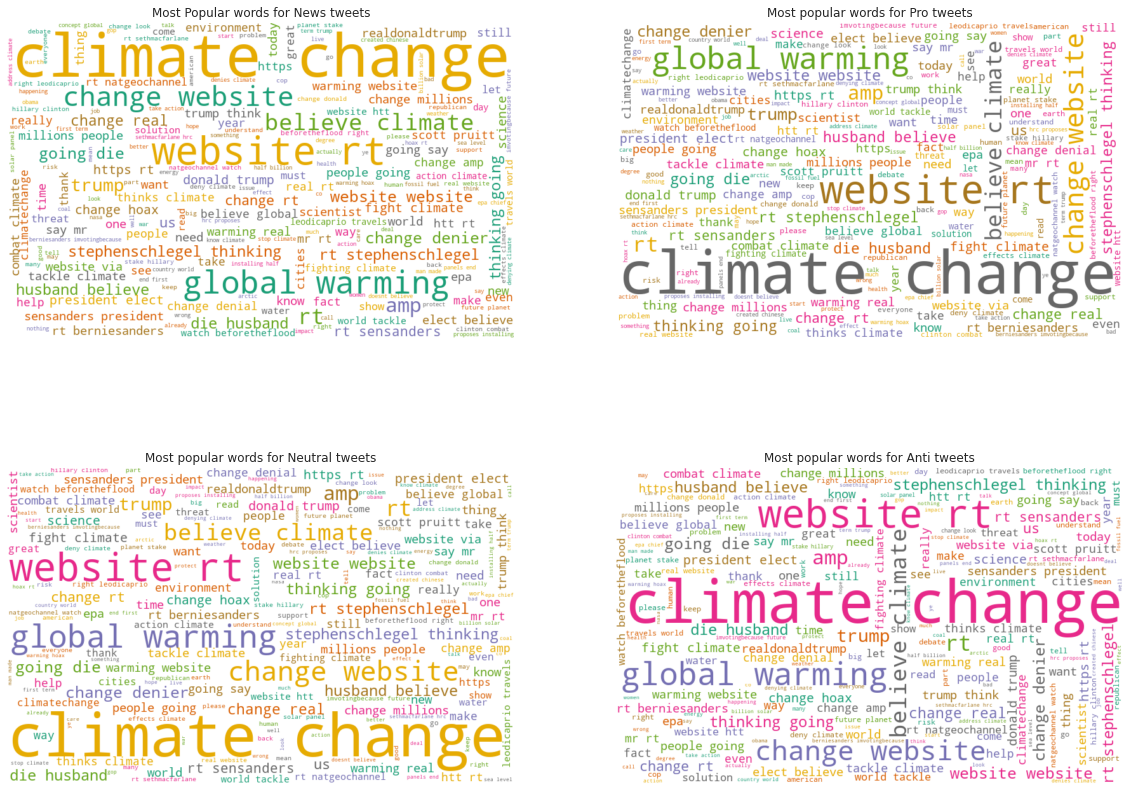

In [24]:
# Create word clouds of the most common words in each sentiment class
wc = WordCloud(width=800, height=500, 
               background_color='white', colormap='Dark2',
               max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots 
for i in range(0, len(tweet_list)):
    wc.generate(tweet_list[1])
    
    plt.subplot(2, 2, i + 1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(full_title[i])
    
plt.show()

**Notes:**

***Observations***:
* The most popular words in all 4 classes are Climate Change, Global Warming.

***Insights***:
* There is some unnecessary data. The words http, https, website, co & RT are prominent, but will not assist us in our classification.


* In fact, the top 5 words in all classes are the same, except for the News class, in which the word 'Trump' features prominently.

## 5.3 **Exploring the impact of Handles on the sentiment classes:**
A Twitter handle is the username that appears at the end of your unique Twitter URL. Twitter handles appear after the @ sign in your profile URL and it must be unique to your account. A Twitter name, on the other hand, is simply there to help people find the company they're looking for.

In [25]:
# Creating a function to extract handles from tweets
def extract_handles(x):
    """ This function finds handles in a 
        tweet and returns them as a list"""
    handles = []
    for i in x:
        h = re.findall(r'@(\w+)', i)
        handles.append(h)
        
    return handles

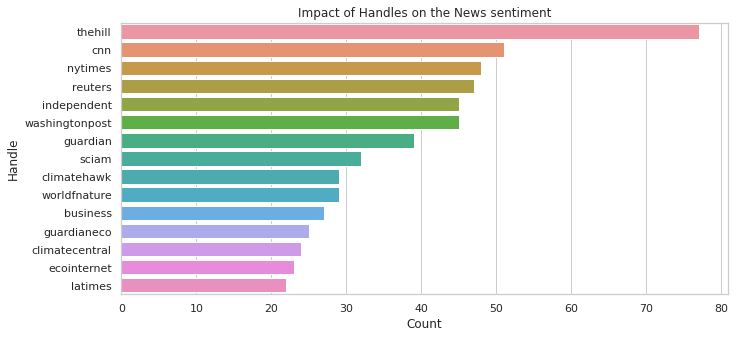

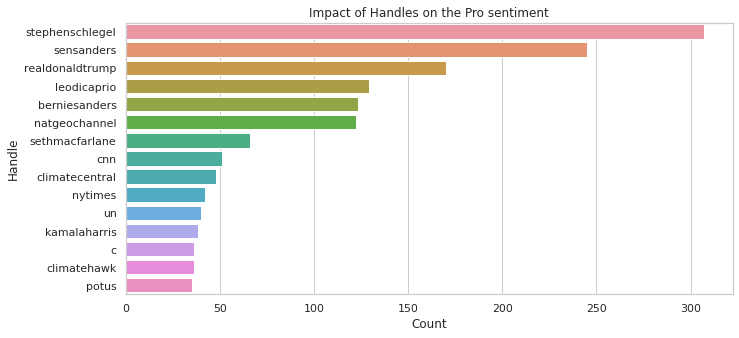

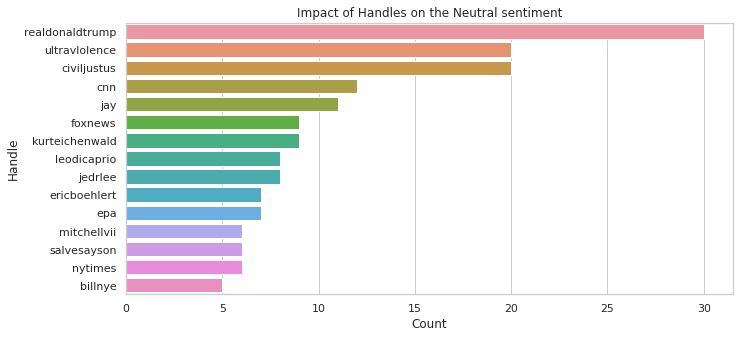

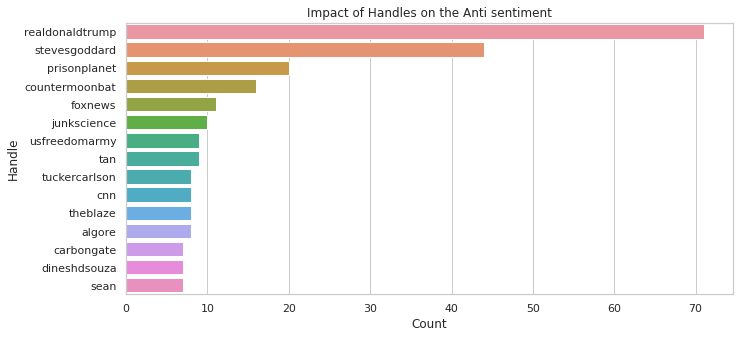

In [26]:
# Extracting handles from tweets
news_h = extract_handles(tweets_df['message']
                              [tweets_df['sentiment'] == 2])
pro_h = extract_handles(tweets_df['message']
                          [tweets_df['sentiment'] == 1])
neutral_h = extract_handles(tweets_df['message']
                              [tweets_df['sentiment'] == 0])
anti_h = extract_handles(tweets_df['message']
                          [tweets_df['sentiment'] == -1])

# Unnesting list
handles = [sum(news_h, []), sum(pro_h, []), sum(neutral_h, []),
           sum(anti_h, [])]

# Visualising the Handles
full_title = ['Impact of Handles on the News sentiment',
              'Impact of Handles on the Pro sentiment',
              'Impact of Handles on the Neutral sentiment',
              'Impact of Handles on the Anti sentiment']

plt.rcParams['figure.figsize'] = [50, 5]

for i, sent in enumerate(handles):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent)
    df = pd.DataFrame({'Handle': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df, y='Handle', x='Count')
    plt.title(full_title[i])
    plt.show()

**Notes:**

***Observations***:
* The most popular News handles are actual news broadcaster accounts.

* The most popular Pro handles seem to be celebrity accounts & news accounts.

* Trump features most for most popular Anti & Neutral tweets. 

***Insights***:
* Celebrities have been raising climate change as an issue to increase public awareness.

* Most popular trends handles are American, as most Twitter users reside in the United States of America, 64.2%. [Click here](http://statista.com/statistics/242606/number-of-active-twitter-users-in-selected-countries)

* It is interesting that Fox News, does not appear in the positive sentiment. The company is usually under scrutiny from the public as they are perceived to support Republican policies in the United States of America.

## 5.4 **Exploring the impact of Hashtags on the sentiment classes:**
People use the hashtag symbol (#) before a relevant keyword or phrase in their Tweet to categorize those Tweets and help them show more easily in Twitter search. Clicking or tapping on a hashtagged word in any message shows you other Tweets that include that hashtag. Hashtags can be included anywhere in a Tweet.

In [27]:
# Creating a function to extract hashtags from tweets
def extract_hashtags(x):
    """ The following function finds hashtags on a 
        tweet and returns them as a list"""
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
        
    return hashtags

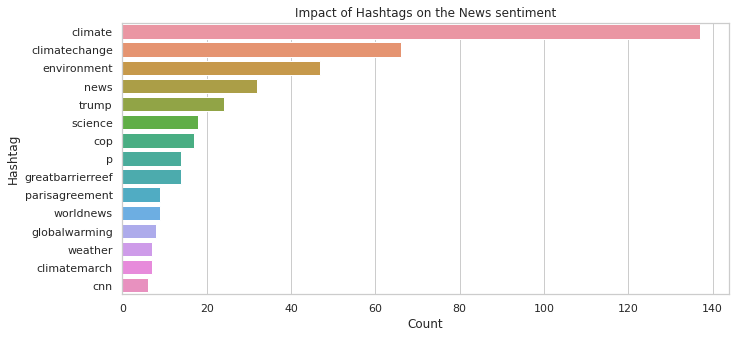

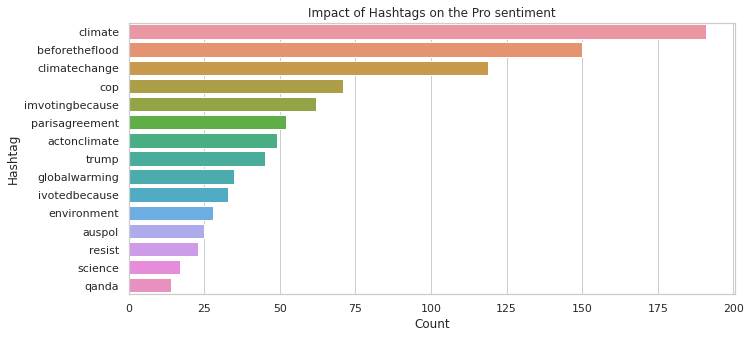

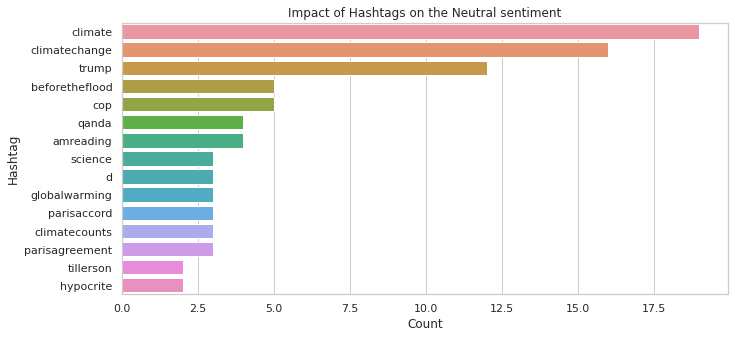

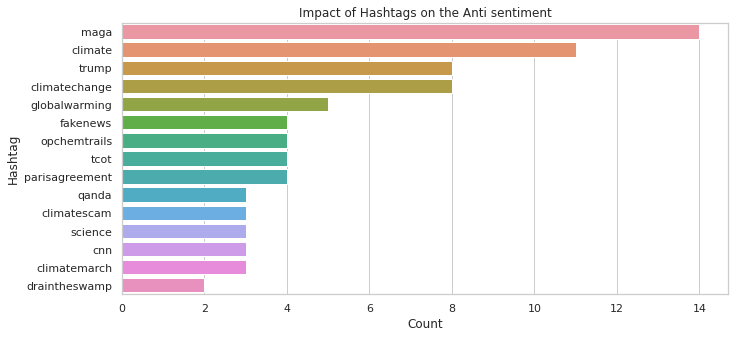

In [28]:
# Extracting hashtags from tweets
news_ht = extract_hashtags(tweets_df['message']
                              [tweets_df['sentiment'] == 2])
pro_ht = extract_hashtags(tweets_df['message']
                          [tweets_df['sentiment'] == 1])
neutral_ht = extract_hashtags(tweets_df['message']
                              [tweets_df['sentiment'] == 0])
anti_ht = extract_hashtags(tweets_df['message']
                          [tweets_df['sentiment'] == -1])

# Unnesting list
hashtags = [sum(news_ht, []), sum(pro_ht, []),
            sum(neutral_ht, []),sum(anti_ht, [])]

# Visualising the Hashtags
full_title = ['Impact of Hashtags on the News sentiment',
              'Impact of Hashtags on the Pro sentiment',
              'Impact of Hashtags on the Neutral sentiment',
              'Impact of Hashtags on the Anti sentiment']

plt.rcParams['figure.figsize'] = [50, 5]

for i, sent in enumerate(hashtags):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent)
    df = pd.DataFrame({'Hashtag': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df, y='Hashtag', x='Count')
    plt.title(full_title[i])
    plt.show()

**Notes:**

***Observations***:
* We can see that the top 5 hashtags are generally similar, although there seem to be words here that are irrelevant, eg. single letters like 'd', 'p' & words like 'maga' & 'tcot' 

#### Now we will clean up the Hashtags, to get a clearer picture of the most prominent ones

In [29]:
# Function to extract hashtags - not based on Sentiment
def extract_hashtags(tweet):
    '''Provides a tweet and extract hashtags from it'''
    hashtags_only = []
    if len(re.findall("(#[^#\s]+)", tweet)) > 0:
        hashtags_only.append(re.findall("(#[^#\s]+)",
                                        tweet))
    else:
        hashtags_only.append(["0"])
    return hashtags_only[0]

In [30]:
# Creating a dataframe to store the hashtags & visualise them
hashtag_df = train_df.copy()
hashtag_df['tweet_hashtags'] = hashtag_df['message'].map(extract_hashtags)

In [31]:
# Now we will extract the hashtags to a list
all_hashtags = hashtag_df['tweet_hashtags'].tolist()

# Next we observe that our all_hashtags is a list of lists...lets change that
cleaned_hashtags = []
for i in all_hashtags:
    for j in i:
            cleaned_hashtags.append(j)

# Convert cleaned_hashtags to a series and count the most frequent occuring
cleaned_hashtag_series = pd.Series(cleaned_hashtags)
hashtag_counts = cleaned_hashtag_series.value_counts()

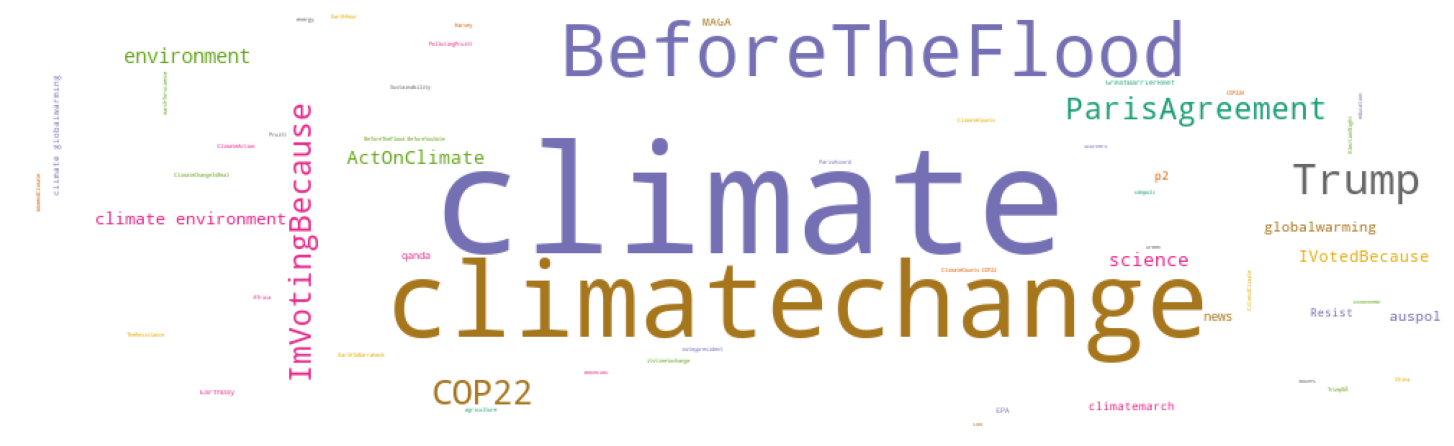

In [32]:
# Changing the series to an ndarray
hashes = cleaned_hashtag_series.values
hashes = hashes.tolist()

# Convert list to one string with all the words
hashes_words = " ".join(hashes)

# Generate the wordcloud. The max_words argument controls the number of words on the cloud
wordcloud = WordCloud(width=1000, height=300,relative_scaling=1.0
                      ,background_color='white', colormap='Dark2',
                      max_words=100).generate(hashes_words)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

**Notes:**

***Observations***:
* We can see the top hashtags more clearly now. 

***Insights***:
* The top 3 hashtags are: 
    1. climate
    2. climatechange
    3. BeforeTheFlood



* The hashtags also give us an indication of the time the data was gathered, i.e. the documentary called 'Before the Flood', where actor Leonardo DiCaprio meets with scientists, activists and world leaders to discuss the dangers of climate change and possible solutions was released in October 2016.

## 5.5 **Duplicate Tweets:**
Twitter allows a user to retweet, or RT another users tweets. We see RT as a popular word in the above visuals. This is great for creating trends, but not useful for sentiment analysis. Now we will remove the duplicates to get a clearer picture of our data set.

In [33]:
# Select all duplicate rows based on the message column
message = tweets_df[tweets_df.
                    duplicated(['message',
                                'sentiment'],
                               keep=False)]

# View top 5 duplicate rows
message.head()

,message,sentiment
10,rt @stephenschlegel thinking going die husband...,1
17,rt @patagonia elected leaders fail approach en...,1
18,rt @sensanders president elect believe climate...,1
21,rt @world wildlife climate change impacts wild...,1
35,rt @berniesanders #imvotingbecause future plan...,1


We can now visualise the duplicate tweets:

Text(0.5, 1.0, 'Class Distributions for Duplicate tweets')

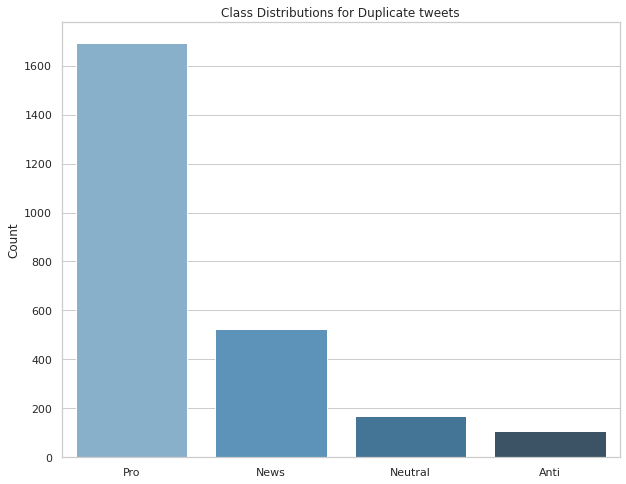

In [34]:
# Create class distribution dataframe for the duplicate tweets
class_dist = pd.DataFrame(list(message['sentiment'].value_counts()), 
                 index=['Pro', 'News', 'Neutral', 'Anti'],
                          columns=['Count'])

# Plot class distribution
class_dis_figure = plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
sns.barplot(x=class_dist.index, y=class_dist.Count, 
           palette="Blues_d",)
plt.title('Class Distributions for Duplicate tweets')

In [35]:
# View a count of class distribution for duplicate tweets
class_dist

,Count
Pro,1692
News,524
Neutral,168
Anti,108


**Notes:**

***Observations***:
* The most popular 

***Insights***:
* 

<a id="6"></a>
# 6 Data Preprocessing

<a id="6.1"></a>
## 6.1 Merge the train & test datasets:
This will allow us to preprocess the train & test data sets simultaneously.

In [36]:
# Merging both the data sets
combine_df = train_df.append(test_df, 
                             ignore_index=True,
                             sort=False)
combine_df.head(3)

,sentiment,message,tweetid
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1.0,It's not like we lack evidence of anthropogeni...,126103
2,2.0,RT @RawStory: Researchers say we have three ye...,698562


In [37]:
# Combine (Merged) Data Set Information
print('Combine Data Set Info - Total Rows | Total Columns | Total Null Values')
print(combine_df.info())

Combine Data Set Info - Total Rows | Total Columns | Total Null Values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26365 entries, 0 to 26364
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sentiment  15819 non-null  float64
 1   message    26365 non-null  object 
 2   tweetid    26365 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 618.1+ KB
None


<a id="6.2"></a>
## 6.2 Converting Hypertext Markup Language(HTML) entities:
An HTMLParser instance is fed HTML data and calls handler methods when start tags, end tags, text, comments, and other markup elements are encountered. Removal of words in our data like '&amp', '&lt' (which are basically used in HTML).

In [38]:
html_parser = HTMLParser()
# Created a new columns i.e. clean_tweet contains the same tweets but cleaned version
combine_df['clean_message'] = combine_df['message'].apply(lambda x: html_parser.unescape(x))
combine_df.head(3)

,sentiment,message,tweetid,clean_message
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,PolySciMajor EPA chief doesn't think carbon di...
1,1.0,It's not like we lack evidence of anthropogeni...,126103,It's not like we lack evidence of anthropogeni...
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,RT @RawStory: Researchers say we have three ye...


<a id="6.3"></a>
## 6.3 Changing all the Tweets into lowercase:
The following changes all the messeges in the 'clean_message' column of the dataframe into lowercase. 

In [39]:
combine_df['clean_message'] = combine_df['clean_message'].apply(lambda x: x.lower())
combine_df.head(3)

,sentiment,message,tweetid,clean_message
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief doesn't think carbon di...
1,1.0,It's not like we lack evidence of anthropogeni...,126103,it's not like we lack evidence of anthropogeni...
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,rt @rawstory: researchers say we have three ye...


<a id="6.4"></a>
## 6.4 Word Tokenization:
NLTK provides a function called word_tokenize() for splitting strings into tokens (nominally words). It splits tokens based on white space and punctuation. For example, commas and periods are taken as separate tokens.

In [40]:
# Creating token for the clean tweets
combine_df['tweet_token'] = combine_df['clean_message'].apply(lambda x: word_tokenize(x))

## Fully formated tweets & there tokens
combine_df.head(3)

,sentiment,message,tweetid,clean_message,tweet_token
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief doesn't think carbon di...,"[polyscimajor, epa, chief, does, n't, think, c..."
1,1.0,It's not like we lack evidence of anthropogeni...,126103,it's not like we lack evidence of anthropogeni...,"[it, 's, not, like, we, lack, evidence, of, an..."
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,rt @rawstory: researchers say we have three ye...,"[rt, @, rawstory, :, researchers, say, we, hav..."


<a id="6.5"></a>
## 6.5 Removing Stop Words:
What we can see is that stop words are the most used, but in fact they don't help us determine if a tweet is happy/sad, however, they are consuming memory and they are making the learning process slower, so we really need to get rid of them.

In [41]:
# Importing stop words from NLTK corpus for english language
stop_words = set(stopwords.words('english'))

In [42]:
# Created new columns of tokens without stop words
combine_df['tweet_token_filtered'] = combine_df['tweet_token'
                                               ].apply(lambda x:[word for word in x if not word in stop_words])

# Tokenized columns with stop words and without stop words
combine_df[['tweet_token', 'tweet_token_filtered']].head(3)

,tweet_token,tweet_token_filtered
0,"[polyscimajor, epa, chief, does, n't, think, c...","[polyscimajor, epa, chief, n't, think, carbon,..."
1,"[it, 's, not, like, we, lack, evidence, of, an...","['s, like, lack, evidence, anthropogenic, glob..."
2,"[rt, @, rawstory, :, researchers, say, we, hav...","[rt, @, rawstory, :, researchers, say, three, ..."


<a id="6.6"></a>
## 6.6 Word Stemming:
There are words that have the same meaning, but written in a different manner, sometimes in the plural and sometimes with a suffix (ing, es ...), this will make our model think that they are different words and also make our vocabulary bigger (waste of memory and time for the learning process). The solution is to reduce those words with the same root, this is called stemming. Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach.

In [43]:
# Created one more columns tweet_stemmed
stemming = PorterStemmer()
combine_df['tweet_stemmed'] = combine_df['tweet_token_filtered'].apply(lambda x: ' '.join([stemming.stem(i) for i in x]))
combine_df.head(3)

,sentiment,message,tweetid,clean_message,tweet_token,tweet_token_filtered,tweet_stemmed
0,1.0,PolySciMajor EPA chief doesn't think carbon di...,625221,polyscimajor epa chief doesn't think carbon di...,"[polyscimajor, epa, chief, does, n't, think, c...","[polyscimajor, epa, chief, n't, think, carbon,...",polyscimajor epa chief n't think carbon dioxid...
1,1.0,It's not like we lack evidence of anthropogeni...,126103,it's not like we lack evidence of anthropogeni...,"[it, 's, not, like, we, lack, evidence, of, an...","['s, like, lack, evidence, anthropogenic, glob...",'s like lack evid anthropogen global warm
2,2.0,RT @RawStory: Researchers say we have three ye...,698562,rt @rawstory: researchers say we have three ye...,"[rt, @, rawstory, :, researchers, say, we, hav...","[rt, @, rawstory, :, researchers, say, three, ...",rt @ rawstori : research say three year act cl...


PorterStemmer uses Suffix Stripping to produce stems. Notice how the PorterStemmer is giving the root (stem) of the word "researchers" by simply removing the 'ers' after researchers. This is a suffix added to research to make it plural. But if you look at 'evidence'it is stemmed to 'evid' because **PorterStemmer algorithm does not follow linguistics rather a set of 05 rules for different cases that are applied in phases (step by step) to generate stems**. This is the reason why PorterStemmer does not often generate stems that are actual English words. It does not keep a lookup table for actual stems of the word but applies algorithmic rules to generate stems.

#### Now that our data preprocessing is complete, let's prepare it for machine learning.

<a id="7"></a>
# 7. Feature Engineering

<a id="7.1"></a>
## **7.1 Split data into Train & Test sets:**
Now that our Preprocessing is complete, we can separate the data back into the train & test sets.

In [44]:
# Splitting the data into train & test
train_stemmed = combine_df[:15819]
test_stemmed = combine_df[15819:].drop(['sentiment'], axis=1)

<a id="7.2"></a>
## 7.2 CountVectorizer:
The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary. An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document.

In [46]:
# Setting the parameters for the Vectorizer

vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )

<a id="7.3"></a>
## 7.3 Building the pipeline:
It's always a good practice to make a pipeline of transformation for your data, it will make the process of data transformation really easy and reusable. We will implement a pipeline for transforming our tweets to something that our ML models can digest (vectors).

In [47]:
# Building a Pipeline for word vectorization
pipe = Pipeline( [('vect', vectorizer)] )

In [48]:
# Pickle pipeline for Streamlit App
# Save the Linear SVC model to disk
filename = 'pipeline.pickle'
pickle.dump(pipe, open(filename, 'wb'))

In [49]:
# Fitting & transforming the data
train_vect = pipe.fit_transform(train_stemmed['tweet_stemmed'])
test_vect = pipe.transform(test_stemmed['tweet_stemmed'])

In [50]:
# Inspecting the shape of our vectorized data
print('train dim:', train_vect.shape, 'test dim:', test_vect.shape)

train dim: (15819, 126743) test dim: (10546, 126743)


<a id="8"></a>
# 8. Modeling

<a id="8.1"></a>
## 8.1 Train-test split:
We split the data into train and test sets for for model prediction. To ensure  that the data is split correctly taking into account the imbalace of the classes, we will set the 'stratify' parameter of sklearn's train_test_split function. For more infomation [click here.](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [51]:
# Splitting the data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(train_vect, train_df['sentiment'],
                                                    test_size = 0.2, random_state=42,
                                                    stratify=train_df['sentiment'])

<a id="8.2"></a>
## 8.2 Model training:

Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (sentiment positive or negative) with other variables. We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

- Logistic Regression
- Nearest Neighbors
- Linear SVC
- RBF SVC
- Linear SVM
- Decision Tree
- Random Forrest
- AdaBoost
- XGBoost


In [52]:
# These are the different Classification models we will train our data on
# Creating a list of names so we can print metrics for the entire list at once
names = ['Logistic Regression'
         ,'Nearest Neighbors'
         ,'Linear SVC'
         , 'RBF SVC'
         , 'Linear SVM'
         , 'Decision Tree'
         , 'Random Forest'
         ,  'AdaBoost'
]

In [53]:
# These are the different Classification models we will train our data on
# Creating a list of names so we can print metrics for the entire list at once
classifiers = [
    LogisticRegression()
    , KNeighborsClassifier(3)
    , SVC(kernel="linear", C=0.025)
    , SVC(gamma=2, C=1)
    , LinearSVC()
    , DecisionTreeClassifier(max_depth=5)
    , RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
    , AdaBoostClassifier()
]

In [54]:
# Training of models, scoring & appending to results list
results = []

# Creating dictionaries to store evaluation results
models = {}
confusion = {}
class_report = {}

# This will calculate the total training time of each model
for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

# This will show us the status of the training
    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

# This will show us the status of the scoring
    print ('... scoring')
    
# These are our evaluation measures
    accuracy  = metrics.accuracy_score(y_train, y_pred)
    precision = metrics.precision_score(y_train, y_pred, average='macro')
    recall    = metrics.recall_score(y_train, y_pred, average='macro')

    f1        = metrics.f1_score(y_train, y_pred, average='macro')
    f1_test   = metrics.f1_score(y_test, y_pred_test, average='macro')

# Save the results to dictionaries
    models[name] = clf
    confusion[name] = metrics.confusion_matrix(y_train, y_pred)
    class_report[name] = metrics.classification_report(y_train, y_pred)

    results.append([name, accuracy, precision,
                    recall, f1, f1_test, run_time.best])

# Creating a dataframe of the results to view easily
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy',
                                         'Precision', 'Recall', 'F1 Train',
                                         'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

Fitting Logistic Regression model...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Linear SVC model...
... predicting
... scoring
Fitting RBF SVC model...
... predicting
... scoring
Fitting Linear SVM model...
... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting AdaBoost model...


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


... predicting
... scoring


In [56]:
# Viewing the results in a dataframe
results.sort_values('F1 Test', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
Logistic Regression,0.999447,0.999346,0.998684,0.999015,0.654467,14.034870
Linear SVM,0.999842,0.999723,0.999734,0.999728,0.651837,3.241729
Linear SVC,0.827341,0.897270,0.681826,0.740422,0.553351,32.079903
AdaBoost,0.646385,0.636097,0.500226,0.535485,0.520299,67.350170
Decision Tree,0.608692,0.659594,0.392381,0.410682,0.412684,1.629155
Nearest Neighbors,0.510549,0.648609,0.561248,0.503778,0.342630,0.002358
RBF SVC,0.999842,0.999831,0.999626,0.999728,0.254460,89.172731
Random Forest,0.539234,0.134808,0.250000,0.175163,0.175154,0.049095


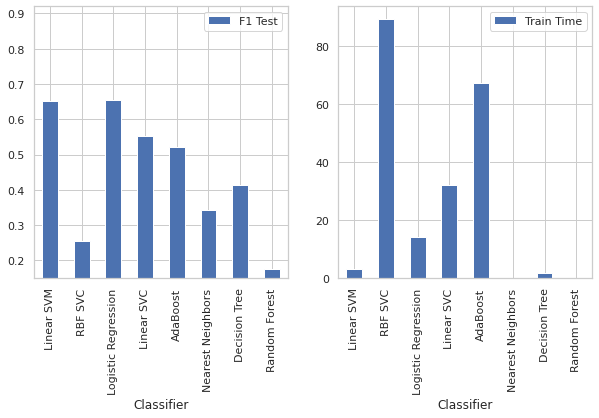

In [57]:
# Viewing the results on a bar chart
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('F1 Train', ascending=False, inplace=True)
results.plot(y=['F1 Test'], kind='bar', ax=ax[0],
             xlim=[0,1.1], ylim=[0.15,0.92])
results.plot(y='Train Time', kind='bar', ax=ax[1])

**Notes:**

***Observations***:

* The RBF & Adaboost models took long the longest to train but didn't perform well on the F1 test.

* All other models were trained relatively fast in comparison to the RBF & Adaboost.

* From the results table & bar chart, we can see the models that perform best are the Logistic Regression & Linear Support Vector Machines(SVM). We will now try & improve on these two models. 

<a id="8.3"></a>
## 8.3 Tuning the chosen models

#### To improve our models, we will use Cross-validation & Grid Search methods

* Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation. Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.


* Grid-searching is the process of scanning the data to configure optimal parameters for a given model. Grid-Search will build a model on each parameter combination possible.

Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of **two categories**, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference [Wikipedia](https://en.wikipedia.org/wiki/Support_vector_machine).

Note that the model generates a confidence score which is higher than Logistics Regression model.

In [58]:
# Setting the number of folds

kfold = StratifiedKFold( n_splits = 150)

## Linear SVC Model

In [59]:
# Linear SVC model
#Set the parameters according to the first run output (C = 0.09)
param_grid2 = {'C': [0.01, 0.03, 0.06, 0.09]}

# Grid Search on the Linear SVC model
gs_sv = GridSearchCV(LinearSVC(), param_grid = [param_grid2], 
                     verbose = 1, cv = kfold, n_jobs = -1)

# Fitting the model to our data
gs_sv.fit(X_train, y_train)

# Find the best estimator
gs_sv_best = gs_sv.best_estimator_

# Print the best parameters
print(gs_sv.best_params_)

# Print the best score
print(gs_sv.best_score_)

Fitting 150 folds for each of 4 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  6.7min finished


{'C': 0.06}
0.7511792717086835


In [60]:
# Building Linear SVC model with best parameters
lr_svc = LinearSVC(C=0.06)

# Training the model on the whole training dataset
lr_svc.fit(train_vect, train_df['sentiment'])

# Print the best parameters
print(gs_sv.best_params_)

# Print the best score
print(gs_sv.best_score_)

{'C': 0.06}
0.7511792717086835


Our Linear SVC model gives us a score of around 75%. Let's check the score of the Logistic Regression model.

Next we model using Logistic Regression which is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression).


## Logistic Regression Model

In [61]:
# Logistic Regression model
lr = LogisticRegression(class_weight='balanced')
'''The balanced class weight automatically balances data based on the label frequency'''

#Set the parameters according to the first run output (C = 0.09)
lr2_param = {
    'multi_class':[('ovr')],
    'penalty':['l2'],
    'dual':[False],
    'C':[5]   
    }

# Grid Search on the Logistic Regression model
lr_CV = GridSearchCV(lr, param_grid=[lr2_param],
                     cv=kfold, n_jobs=-1, verbose=1)

#  Fitting the model to our data
lr_CV.fit(train_vect, train_df['sentiment'])

# Print the best parameters
print(lr_CV.best_params_)

# Find the best estimator
logi_best = lr_CV.best_estimator_

# Print the best score
print(lr_CV.best_score_)

Fitting 150 folds for each of 1 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 16.8min finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

{'C': 5, 'dual': False, 'multi_class': 'ovr', 'penalty': 'l2'}
0.757644204851752


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [62]:
# Building Logistic Regression model with best parameters
lg_reg = LogisticRegression(class_weight='balanced', multi_class=('ovr'), 
                            penalty='l2', dual=False, C=5)

# Training the model on the whole training dataset
lg_reg.fit(train_vect, train_df['sentiment'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(C=5, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Combine Model Predictions Into Ensemble Predictions
Using a Voting classifier simply means building multiple models (typically of differing types) and simple statistics (like calculating the mean) are used to combine predictions. It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.[click here](https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/)

In [63]:
# create the ensemble model
estimators = {('linearSVC', lr_svc), ('logistic', lg_reg)}
ensemble = VotingClassifier(estimators)
ensemble.fit(train_vect, train_df['sentiment'])

# Checking model perfomance
print('accuracy: {}'.format(metrics.accuracy_score(y_train, y_pred)))
print('precision: {}'.format(metrics.precision_score(y_train, y_pred, average='macro')))
print('recall: {}'.format(metrics.recall_score(y_train, y_pred, average='macro')))
print('f1_score: {}'.format(metrics.f1_score(y_train, y_pred, average='macro')))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


accuracy: 0.6463848281311735
precision: 0.6360967168221573
recall: 0.500225554730201
f1_score: 0.5354853914205312


<a id="11"></a>
# 9. Generating a submission file
Now that best our model is tuned, we can make predictions on the unseen test data, generate a submission file & submit to Kaggle.

In [64]:
# Making predictions on the test data set
submission1 = gs_sv.predict(test_vect)

In [66]:
# Appending the prediction results to the test set, in a new column called 'sentiment'
output = pd.DataFrame( data = {'tweetid': test_df['tweetid'],
                               'sentiment': submission1 })

# Creating a csv file
output.to_csv('submission_final.csv', index = False, quoting = 3)

In [67]:
#only in google colab
files.download('submission_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##10. References

- 1.https://towardsdatascience.com/classifying-climate-change-tweets-8245450a5e96
- 2.https://towardsdatascience.com/classifying-climate-change-tweets-8245450a5e96
- 3.**Stackoverflow**
- 4.https://github.com/gravesa333/Classifying_Climate_Change_Tweets/blob/master/.ipynb_checkpoints/Project_04_Classifier_R1-checkpoint.ipynb
- 5.**Geeksforgeeks**........>
- 6. **W3resources and W3 schools** 
- 7. **Trains Athena**
-8. **Preprocessing Athena**
-9. **Starternootebook**